<a href="https://colab.research.google.com/github/Wandafebrr/PCVK_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Tugas Praktikum**

**1. Membuat gamma correction**

 Gamma Correction pada Citra 
-----------------------------
Masukkan nilai Gamma: 3


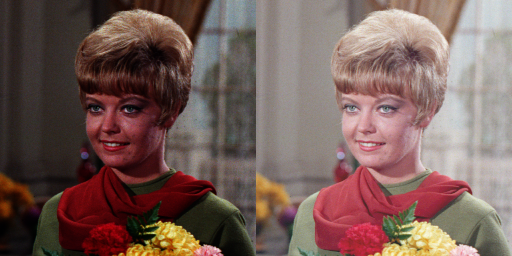

In [ ]:
print(' Gamma Correction pada Citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c]=np.clip(255 * pow (original[y,x,c] / 255, (1/gamma)), 0,255)

final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)

**2. Membuat Simulasi Image Depth**

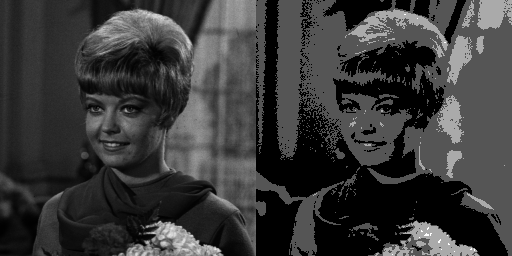

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)


**3. Membuat modul Averange Denoising**

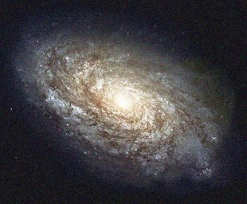

Jumlah Citra yang Di-Average: 5
Nilai PSNR: 20.96933125770277 dB
 


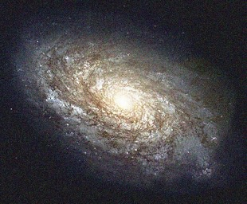

Jumlah Citra yang Di-Average: 10
Nilai PSNR: 19.455906185333284 dB
 


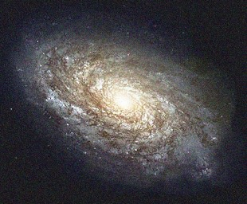

Jumlah Citra yang Di-Average: 20
Nilai PSNR: 19.412797918533823 dB
 


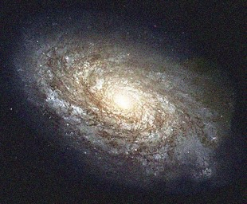

Jumlah Citra yang Di-Average: 40
Nilai PSNR: 19.424641763636433 dB
 


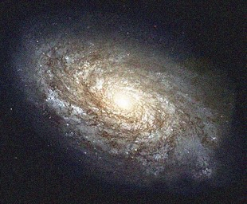

Jumlah Citra yang Di-Average: 80
Nilai PSNR: 19.42335925427267 dB
 


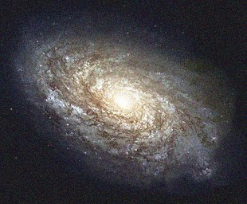

Jumlah Citra yang Di-Average: 100
Nilai PSNR: 19.42968891662536 dB
 


In [ ]:
import glob

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/pcvk/galaxy.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
noise_images = []
for img_path in glob.glob('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/noises/*.jpg'):
    noise = cv.imread(img_path)
    noise_images.append(noise)

# Inisialisasi citra gabungan dengan citra asli
combined_image = np.copy(original)

# List untuk menyimpan nilai PSNR tiap citra gabungan
psnr_values = []

# Jumlah citra yang akan di-average
jumlah_citra_di_average = [5, 10, 20, 40, 80, 100]

for jumlah_noise in jumlah_citra_di_average:
    # Mengambil n citra pertama dari list
    selected_images = noise_images[:jumlah_noise]

    # Proses penggabungan citra dengan Gaussian Noise ke citra asli dan menghitung PSNR
    for noise_image in selected_images:
        # Pastikan citra noise memiliki ukuran yang sama dengan citra asli
        noise_image = cv.resize(noise_image, (original.shape[1], original.shape[0]))

        # Lakukan penggabungan dengan operasi addWeighted
        combined_image = cv.addWeighted(combined_image, 0.7, noise_image, 0.3, 0)

    # Menghitung nilai PSNR antara citra asli dan citra gabungan
    psnr = cv.PSNR(original, combined_image)
    psnr_values.append(psnr)

    # Menampilkan citra gabungan
    cv2_imshow(combined_image)
    print(f'Jumlah Citra yang Di-Average: {jumlah_noise}')
    print(f'Nilai PSNR: {psnr} dB')
    print(' ')

**4. Image Masking**

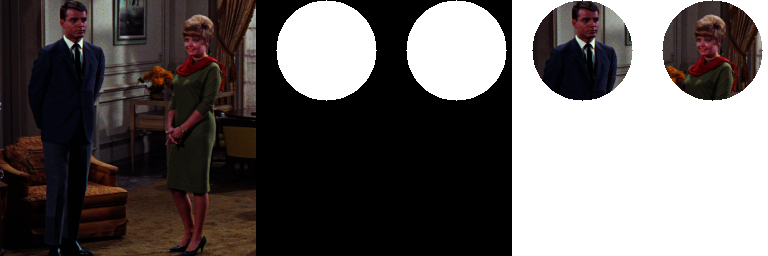

In [ ]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)

mask2 = np.zeros(ori.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

final_mask = ori & mask & mask2
final_mask [mask==0] = 255

final_frame = cv.hconcat((ori, mask, final_mask))
cv2_imshow(final_frame)

Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.
<br>
**operator OR**

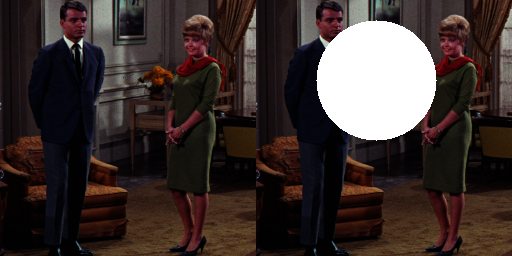

In [ ]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = ori | mask

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)

**Operator NOT**

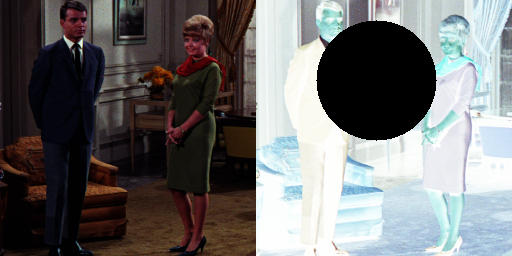

In [ ]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = ~ori & ~mask

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)

**Operator NAND**

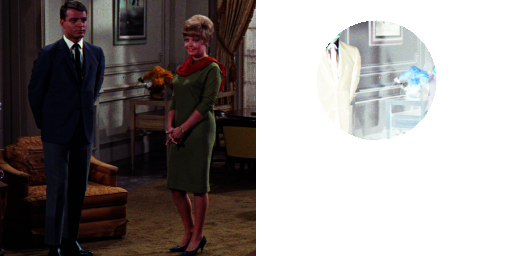

In [ ]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = cv2.bitwise_not(ori & mask)

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)

**Operator XOR**

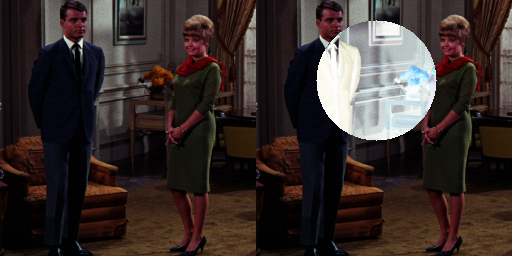

In [ ]:
ori = cv.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')

mask = np.zeros(ori.shape, dtype=np.uint8)
mask = cv.circle(mask, (120, 80), 60, (255, 255, 255), -1)

final_mask = cv2.bitwise_xor(ori,mask)

final_frame = cv.hconcat((ori, final_mask))
cv2_imshow(final_frame)